In [2]:
import pandas as pd
import yfinance as yf
import datetime
import openpyxl
from datetime import datetime


c:\Users\alice\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
tickers_MSFT_AAPL = ['MSFT', 'AAPL']
DATA_MSFT_AAPL = yf.download(tickers_MSFT_AAPL, period= '1y', interval= '1h')['Close']
DATA_MSFT_AAPL = DATA_MSFT_AAPL.reset_index()
DATA_MSFT_AAPL

[*********************100%%**********************]  2 of 2 completed


Ticker,Datetime,AAPL,MSFT
0,2023-03-14 13:30:00-04:00,151.363403,258.970001
1,2023-03-14 14:30:00-04:00,150.865005,258.265015
2,2023-03-14 15:30:00-04:00,152.520004,260.575012
3,2023-03-15 09:30:00-04:00,150.600006,262.380005
4,2023-03-15 10:30:00-04:00,150.820007,263.799988
...,...,...,...
1752,2024-03-14 09:30:00-04:00,173.664993,426.081390
1753,2024-03-14 10:30:00-04:00,173.339996,426.720001
1754,2024-03-14 11:30:00-04:00,172.669998,424.989990
1755,2024-03-14 12:30:00-04:00,172.962997,423.839996


In [4]:
corr_matrix = DATA_MSFT_AAPL.corr()['MSFT']
corr_matrix

Ticker
Datetime    0.916339
AAPL        0.649408
MSFT        1.000000
Name: MSFT, dtype: float64

In [6]:
DATA_MSFT_AAPL['MSFT_NORM'] = DATA_MSFT_AAPL['MSFT'].multiply(0.58448238).round(4)
DATA_MSFT_AAPL.head()

Ticker,Datetime,AAPL,MSFT,MSFT_NORM
0,2023-03-14 13:30:00-04:00,151.363403,258.970001,151.3634
1,2023-03-14 14:30:00-04:00,150.865005,258.265015,150.9514
2,2023-03-14 15:30:00-04:00,152.520004,260.575012,152.3015
3,2023-03-15 09:30:00-04:00,150.600006,262.380005,153.3565
4,2023-03-15 10:30:00-04:00,150.820007,263.799988,154.1864


In [7]:
DATA_MSFT_AAPL['RACIO'] = ((DATA_MSFT_AAPL['MSFT_NORM'] - DATA_MSFT_AAPL['MSFT']) / (DATA_MSFT_AAPL['MSFT_NORM'] + DATA_MSFT_AAPL['AAPL'])).multiply(100).round(3)
DATA_MSFT_AAPL.head()

Ticker,Datetime,AAPL,MSFT,MSFT_NORM,RACIO
0,2023-03-14 13:30:00-04:00,151.363403,258.970001,151.3634,-35.546
1,2023-03-14 14:30:00-04:00,150.865005,258.265015,150.9514,-35.556
2,2023-03-14 15:30:00-04:00,152.520004,260.575012,152.3015,-35.520
3,2023-03-15 09:30:00-04:00,150.600006,262.380005,153.3565,-35.868
4,2023-03-15 10:30:00-04:00,150.820007,263.799988,154.1864,-35.938


In [8]:
DATA_MSFT_AAPL['Date_time'] = DATA_MSFT_AAPL['Datetime'] + pd.Timedelta(hours=5)
DATA_MSFT_AAPL=DATA_MSFT_AAPL.drop(['Datetime'], axis=1)
DATA_MSFT_AAPL['Date_time'] = DATA_MSFT_AAPL['Date_time'].dt.tz_localize(None)
DATA_MSFT_AAPL=DATA_MSFT_AAPL[['Date_time', 'MSFT', 'AAPL', 'MSFT_NORM', 'RACIO']]

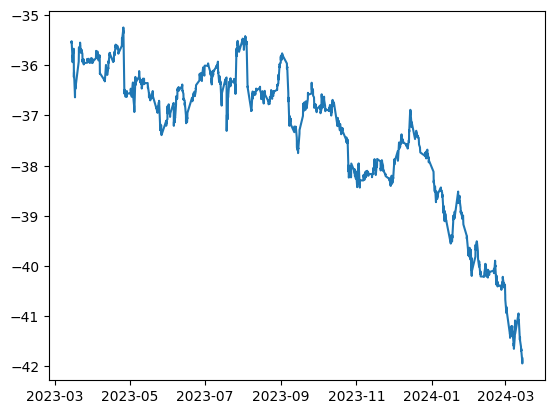

In [9]:
# Plotting the Ratio
import matplotlib.pyplot as plt
plt.plot(DATA_MSFT_AAPL['Date_time'], DATA_MSFT_AAPL['RACIO'])
plt.show()

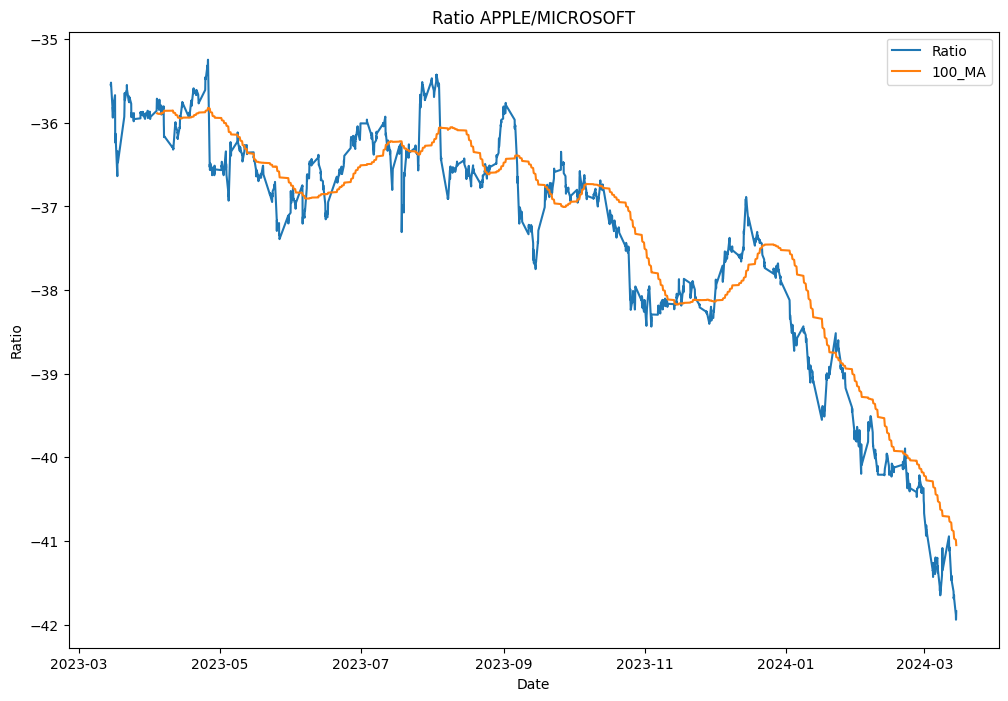

In [12]:
# calculation and plotting moving average of 100 positions 
DATA_MSFT_AAPL['120_MA'] = DATA_MSFT_AAPL['RACIO'].rolling(window=120).mean()
plt.figure(figsize=(12, 8))
plt.plot(DATA_MSFT_AAPL['Date_time'],DATA_MSFT_AAPL['RACIO'], label='Ratio')
plt.plot(DATA_MSFT_AAPL['Date_time'], DATA_MSFT_AAPL['100_MA'], label='100_MA')
plt.title('Ratio APPLE/MICROSOFT')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.legend()
plt.show()



In [8]:
import openpyxl

In [10]:
readerDJ_N_values = pd.read_excel('AMD_NVIDIA.xlsx', sheet_name='DATA')
writer = pd.ExcelWriter('AMD_NVIDIA.xlsx', engine='openpyxl', mode='a', if_sheet_exists="overlay")
DATA_MSFT_AAPL.to_excel(writer, index=False, header=False, sheet_name="DATA",
startrow=len(readerDJ_N_values))
writer.close()